In [ ]:
#importing the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [ ]:
# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert labels to categorical format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and summarize the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3882 - loss: 1.6860 - val_accuracy: 0.5624 - val_loss: 1.2309
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.6007 - loss: 1.1376 - val_accuracy: 0.6428 - val_loss: 1.0327
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6524 - loss: 0.9994 - val_accuracy: 0.6658 - val_loss: 0.9679
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6848 - loss: 0.9017 - val_accuracy: 0.6812 - val_loss: 0.9338
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7093 - loss: 0.8306 - val_accuracy: 0.6803 - val_loss: 0.9429
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7314 - loss: 0.7691 - val_accuracy: 0.6901 - val_loss: 0.9118
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7520 - loss: 0.7156 - val_accuracy: 0.6933 - val_loss: 0.9038
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7648 -

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7037 - loss: 0.8995
Test Accuracy: 0.7029


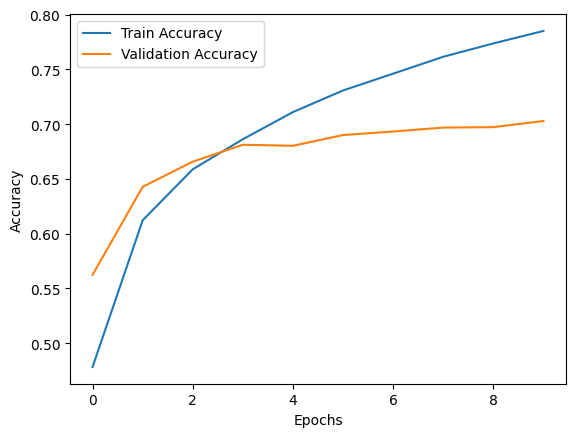

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()